In [1]:
import synapseclient
import synapseutils
import os
import configparser

config_path = os.path.join(os.environ['HOME'], '.synapseConfig')
cfg = configparser.ConfigParser()
cfg.read(config_path)
syn_usr = cfg.get("authentication", "username")
syn_pwd = cfg.get("authentication", "password")
syn = synapseclient.login(email=syn_usr, password=syn_pwd, rememberMe=True)

Welcome, Joy Rimchala!



In [2]:
# Subchallenge 1 data
# *** Note we need to accept term of use on Synapse before the data can be downloaded  

from synapseclient import Activity
from synapseclient import Entity, Project, Folder, File, Link
from synapseclient import Evaluation, Submission, SubmissionStatus
from synapseclient import Wiki
import numpy as np
import pandas as pd
from collections import OrderedDict
sub1_synapse_id = 'syn10139511'
if 'files' not in locals():
    files = synapseutils.syncFromSynapse(syn, sub1_synapse_id)

data_dict = OrderedDict()
for fl in files:
    data_dict[fl.name] = pd.read_csv(fl.path, sep='\t')


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!

In [5]:
# gtruth = ground_truth[ground_truth['Gene_ID']==g][sample_cols].values[0]
# gobs = obs[obs['Gene_ID']==g][sample_cols].values[0]
# gtruth[pd.isnull(gobs)]

OrderedDict([('data_obs_1.txt',
                         Gene_ID   Sample_1   Sample_2   Sample_3   Sample_4   Sample_5  \
              0        Protein_1  30.391022  29.103878  30.070138  29.258080  29.371801   
              1        Protein_2  30.386360  29.093534  30.058996        NaN  29.353317   
              2        Protein_3        NaN  29.091844  30.059338  29.249809        NaN   
              3        Protein_4  30.387267        NaN  30.059926  29.248510        NaN   
              4        Protein_5  30.386282  29.097235        NaN  29.250285  29.354130   
              5        Protein_6  30.386118  29.091964  30.058786        NaN        NaN   
              6        Protein_7  30.386526  29.093700  30.059162  29.249645        NaN   
              7        Protein_8  30.386506        NaN  30.059142  29.249629  29.354490   
              8        Protein_9  28.182457  26.720081  26.766650  26.554346        NaN   
              9       Protein_10  30.243036  30.548320    

In [6]:
# For each Protein, what's the distribution of missing vs. non-missing values compared to truth
# Collect missing data stats across samples

missing = OrderedDict()
not_missing = OrderedDict()
ground_truth = data_dict['data_true.txt']
sample_cols = ground_truth.set_index('Gene_ID').columns
gene_list = ground_truth['Gene_ID'].values

for g in gene_list: 
    gtruth = ground_truth[ground_truth['Gene_ID']==g][sample_cols].values[0]
    for ds, obs in [(k, v) for (k, v) in data_dict.items() if not k.endswith('_true.txt')]:
        gobs = obs[obs['Gene_ID']==g][sample_cols].values[0]
        missing[ds, g] = gtruth[pd.isnull(gobs)]
        not_missing[ds, g] = gtruth[pd.notnull(gobs)]

        if g.endswith("500") & ds.endswith("9.txt"): 
            print("obs {}: gene: {}".format(ds, g))

obs data_obs_9.txt: gene: Protein_500
obs data_obs_9.txt: gene: Protein_1500
obs data_obs_9.txt: gene: Protein_2500
obs data_obs_9.txt: gene: Protein_3500
obs data_obs_9.txt: gene: Protein_4500
obs data_obs_9.txt: gene: Protein_5500
obs data_obs_9.txt: gene: Protein_6500
obs data_obs_9.txt: gene: Protein_7500


In [10]:
# Missing data for each protein across samples

array([  0.        ,  29.24234855,  29.7998622 ,   0.        ,
        30.18672422,   0.        ,  29.95712442,  29.48258424,
         0.        ,   0.        ,   0.        ,   0.        ,
        29.69238298,   0.        ,   0.        ,  29.56149863,
         0.        ,  29.53601563])

In [9]:
ground_truth.tail()

,Gene_ID,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,...,Sample_71,Sample_72,Sample_73,Sample_74,Sample_75,Sample_76,Sample_77,Sample_78,Sample_79,Sample_80
7922,Protein_7923,23.543870,23.418180,24.126511,20.774629,0.000000,0.000000,0.000000,0.000000,23.154931,...,0.000000,23.717899,23.868407,23.063955,22.269158,22.671300,22.178234,21.289879,21.789065,22.142723
7923,Protein_7924,18.629572,18.206602,18.286334,19.184872,0.000000,0.000000,17.858053,18.247724,18.659846,...,18.519593,18.655717,18.245795,18.762873,18.866272,0.000000,0.000000,17.407401,18.365412,18.218294
7924,Protein_7925,22.954395,21.935175,22.446114,23.706330,22.544118,24.235136,23.034959,23.776652,0.000000,...,22.912189,23.615916,22.088944,24.103600,22.909547,23.383378,23.392302,22.400581,23.300602,23.649405
7925,Protein_7926,21.267226,21.765995,21.454914,21.339341,21.267567,21.473752,20.334598,21.441967,21.886459,...,20.814008,21.476780,0.000000,21.390104,20.941812,21.411133,20.735563,20.383588,20.597197,21.472152
7926,Protein_7927,26.367642,24.640699,25.753771,25.662419,26.448354,25.492624,25.671198,25.888657,26.273955,...,26.312740,26.135840,24.638902,26.042056,0.000000,26.326427,25.872375,0.000000,26.213462,26.596957


In [ ]:
% pylab inline
import seaborn as sns
fig, ax = plt.subplots(figsize=(4,4))
truthset = data_dict['data_true.txt'].set_index('Gene_ID')
truthset.ix['Protein_1'].hist(bins=50, ax=ax)
ax.set_title("Protein_1")

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
truthset.ix['Protein_2'].hist(bins=50, ax=ax)
ax.set_title("Protein_2")

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
truthset.ix['Protein_3'].hist(bins=50, ax=ax)
ax.set_title("Protein_3")

In [26]:
# Exploring the data
# 1. Visualize the distribution of data in each dimension. Is it mostly Gaussian?
# 2. Is the missing data draw from the same distribution as the original data?
# 3. PCA
Y.shape

(80, 7927)

(80, 7927)
Populating the interactive namespace from numpy and matplotlib


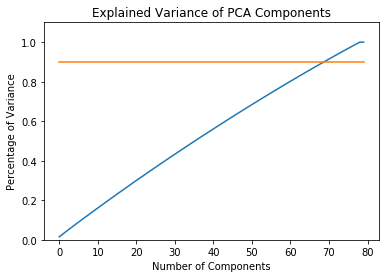

In [40]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 80 samples, 7927 proteins
ground_truth = data_dict['data_true.txt']
Y = ground_truth.set_index('Gene_ID').T.as_matrix()
# Yscaled = MinMaxScaler().fit_transform(Y)
Yscaled = StandardScaler().fit_transform(Y)
print(Yscaled.shape)

pca = sklearnPCA()
nc = 80
pca = sklearnPCA(n_components=nc, whiten=True)
Ypca = pca.fit_transform(Yscaled)
evr = np.cumsum(pca.explained_variance_ratio_)

%pylab inline
plt.plot(evr)
plt.plot([0.9]*nc)
plt.ylim((0.0, 1.1))
plt.title('Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance')

# KMeans
# kmscores = [KMeans(i, n_init=25).fit(Y).score(Y) for i in range(1, 50)]
# kmscores = list()
# for i in range(1,50):
#     km = KMeans(i,n_init=25)
#     km.fit(Y)
#     kmscores.append(km.score(Y))

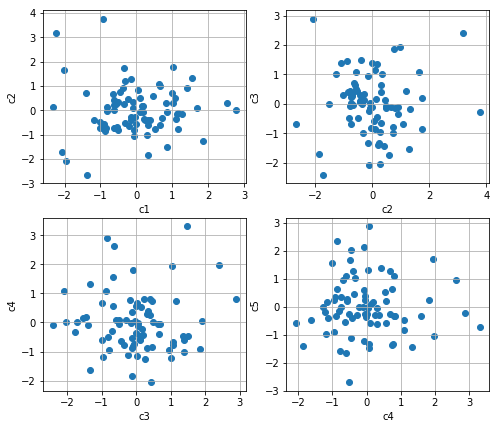

In [58]:
# Plot component by component
fig, ax = plt.subplots(2,2, figsize=(8,7))
ax[0, 0].scatter(Ypca[:, 0], Ypca[:, 1])
ax[0, 0].grid('on')
ax[0, 0].set_xlabel('c1')
ax[0, 0].set_ylabel('c2')

ax[0, 1].scatter(Ypca[:, 1], Ypca[:, 2])
ax[0, 1].grid('on')
ax[0, 1].set_xlabel('c2')
ax[0, 1].set_ylabel('c3')

ax[1, 0].scatter(Ypca[:, 2], Ypca[:, 3])
ax[1, 0].grid('on')
ax[1, 0].set_xlabel('c3')
ax[1, 0].set_ylabel('c4')

ax[1, 1].scatter(Ypca[:, 3], Ypca[:, 4])
ax[1, 1].grid('on')
ax[1, 1].set_xlabel('c4')
ax[1, 1].set_ylabel('c5')

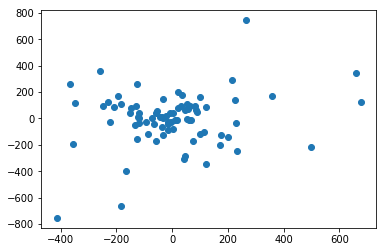

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=10, random_state=0)
np.set_printoptions(suppress=True)
Ytsne = tsne.fit_transform(Yscaled) 

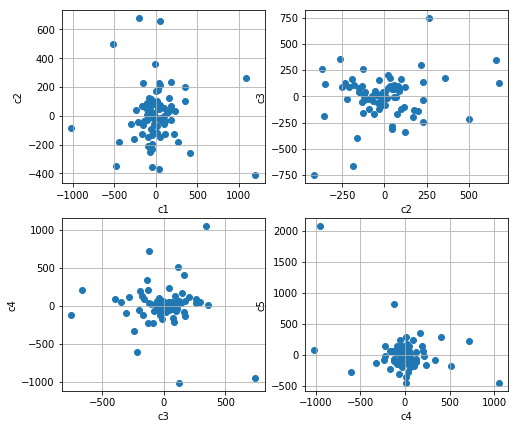

In [57]:
# Plot component by component
fig, ax = plt.subplots(2,2, figsize=(8,7))
ax[0, 0].scatter(Ytsne[:, 0], Ytsne[:, 1])
ax[0, 0].grid('on')
ax[0, 0].set_xlabel('c1')
ax[0, 0].set_ylabel('c2')

ax[0, 1].scatter(Ytsne[:, 1], Ytsne[:, 2])
ax[0, 1].grid('on')
ax[0, 1].set_xlabel('c2')
ax[0, 1].set_ylabel('c3')

ax[1, 0].scatter(Ytsne[:, 2], Ytsne[:, 3])
ax[1, 0].grid('on')
ax[1, 0].set_xlabel('c3')
ax[1, 0].set_ylabel('c4')

ax[1, 1].scatter(Ytsne[:, 3], Ytsne[:, 4])
ax[1, 1].grid('on')
ax[1, 1].set_xlabel('c4')
ax[1, 1].set_ylabel('c5')

In [107]:
# Reshape ground_truth data into the following format: 
# sample gene_ID expression timestamp
import datetime
d = datetime.datetime.utcnow()
long_ground_truth = pd.melt(ground_truth, id_vars=['Gene_ID'], value_vars=sample_cols.tolist())
long_ground_truth = long_ground_truth.rename(columns={'variable': 'Sample_ID'})
long_ground_truth['rand_add'] = np.random.randint(low=0, high=100000, size=(len(long_ground_truth), 1))
long_ground_truth['timestamp'] = long_ground_truth['rand_add'] + (datetime.datetime.utcnow() - datetime.datetime(1970,1,1)).total_seconds()
long_ground_truth[['Sample_ID', 'Gene_ID', 'value', 'timestamp']].to_csv('../data/data_true_long.tsv', sep='\t', header=None, index=False)

In [111]:
from surprise import SVD
from surprise import Dataset
from surprise.dataset import Reader
from surprise import evaluate, print_perf
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file('../data/data_true_long.tsv', reader=reader)
data.split(n_folds=5)
algo = SVD()

# Evaluate performances of our algorithm on the dataset.
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 16.4289
MAE:  15.8000
------------
Fold 2
RMSE: 16.4423
MAE:  15.8137
------------
Fold 3
RMSE: 16.4474
MAE:  15.8211
------------
Fold 4
RMSE: 16.4223
MAE:  15.7897
------------
Fold 5
RMSE: 16.4156
MAE:  15.7903
------------
------------
Mean RMSE: 16.4313
Mean MAE : 15.8030
------------
------------
        Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    
MAE     15.8000 15.8137 15.8211 15.7897 15.7903 15.8030 
RMSE    16.4289 16.4423 16.4474 16.4223 16.4156 16.4313 
